# Marima R library in CoCalc

> Multivariate ARIMA and ARIMA-X estimation using Spliid's algorithm (marima()) and simulation (marima.sim()).



https://cran.r-project.org/package=marima

In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.4                         
year           2018                        
month          03                          
day            15                          
svn rev        74408                       
language       R                           
version.string R version 3.4.4 (2018-03-15)
nickname       Someone to Lean On          

All cases in data,  1  to  90  accepted for completeness.
90 7  = MARIMA - dimension of data 


arma.filter is being called 
indicators for means= 1 1 1 1 1 1 1 
 dim(yseries) 7 94 


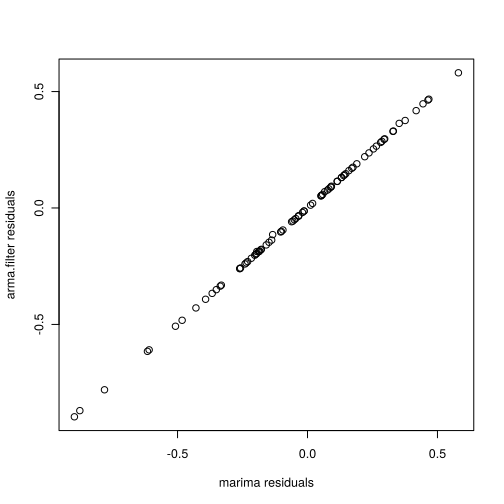

In [2]:
library(marima)
data(austr)
series<-t(austr)[,1:90]
# Define marima model
Model5 <- define.model(kvar=7,ar=1,ma=1,rem.var=1,reg.var=6:7)
# Estimate marima model
Marima5 <- marima(series,Model5$ar.pattern,Model5$ma.pattern,penalty=1)
# Calculate residuals by filtering
Resid <- arma.filter(series, Marima5$ar.estimates,
Marima5$ma.estimates)
# Compare residuals
plot(Marima5$residuals[2, 5:90], Resid$residuals[2, 5:90], xlab='marima residuals', ylab='arma.filter residuals')

Input data is transformed from type = 'time series' (is.ts)
        to matrix).Sampling information is ignored. One line is one sample at a
        certain time point.All cases in data,  1  to  90  accepted for completeness.
90 7  = MARIMA - dimension of data 


Calling arma.forecast.


In the example the input series is dim(length,kvar).


and of type ts() (timeseries) for illustration. 



 Input series is type ts (timeseries).
  It will be changed to matrix(...) using as.matrix(...). 

 Data matrix is to be transposed. Done! 
7  Variables in series , with required length =  100 . 

 print AR-model: 
, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    1    0    0    0    0    0    0
[2,]    0    1    0    0    0    0    0
[3,]    0    0    1    0    0    0    0
[4,]    0    0    0    1    0    0    0
[5,]    0    0    0    0    1    0    0
[6,]    0    0    0    0    0    1    0
[7,]    0    0    0    0    0    0    1

, , 2

     [,1]        [,2]       [,3]        [,4]        [,5]        [,6]      [,7]
[1,]    0  0.00000000  0.0000000  0.00000000  0.00000000  0.00000000 0.0000000
[2,]    0 -0.56193313 -0.8153282  0.03416575  0.00000000  0.57325886 0.0000000
[3,]    0 -0.06075435 -0.3170937  0.00000000 -0.06694902  0.09659622 0.0000000
[4,]    0  0.65334775 -1.6631316 -0.82681628 -0.47195995 -0.96665683 0.3252574
[5,]    0  0.00000000  0.0000000  0.00000000 -0.980095

1959.5 
 1.00077878331063 
 0.197060905030581 
 8.22351229278395 
 1.28373981144414 
 0.1 
 0.5

1.00077878331063 
 1.06162305060619 
 1.15060432312317 
 1.255825600993 
 1.37462646550024 
 1.5057582811964 
 1.64816732488692 
 1.80084140982766 
 1.96281212350129 
 2.13316980065769

                  [,1]         [,2]         [,3]        [,4]         [,5]
Year      2005.0000000 2006.0000000 2007.0000000 2008.000000 2009.0000000
Predict      1.0007788    1.0616231    1.1506043    1.255826    1.3746265
upper.lim    1.4853282    1.7435373    1.9073152    2.044681    2.1785422
lower.lim    0.5162294    0.3797088    0.3938934    0.466970    0.5707108
                 [,6]         [,7]         [,8]        [,9]       [,10]
Year      2010.000000 2011.0000000 2012.0000000 2013.000000 2014.000000
Predict      1.505758    1.6481673    1.8008414    1.962812    2.133170
upper.lim    2.317438    2.4642980    2.6198021    2.783731    2.955526
lower.lim    0.694079    0.8320367    0.9818807    1.141893    1.310814


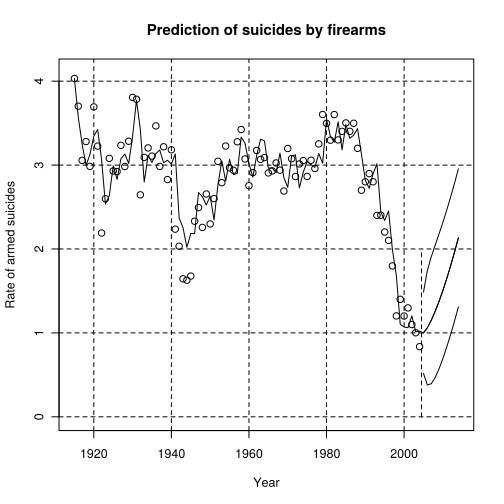

In [3]:
library(marima)
data(austr)
series<-austr
Model5 <- define.model(kvar=7, ar=1, ma=1, rem.var=1, reg.var=6:7)
Marima5 <- marima(ts(series[1:90, ]), Model5$ar.pattern, Model5$ma.pattern,
penalty=1)
nstart <- 90
nstep <- 10
cat("Calling arma.forecast.\n")
cat("In the example the input series is dim(length,kvar).\n")
cat("and of type ts() (timeseries) for illustration. \n")
Forecasts <- arma.forecast(series=ts(series), marima=Marima5,
nstart=nstart, nstep=nstep )
Year<-series[91:100,1]
One.step <- Forecasts$forecasts[, (nstart+1)]
One.step
Predict <- Forecasts$forecasts[ 2, 91:100]
Predict
stdv<-sqrt(Forecasts$pred.var[2, 2, ])
upper.lim=Predict+stdv*1.645
lower.lim=Predict-stdv*1.645
Out<-rbind(Year, Predict, upper.lim, lower.lim)
print(Out)
# plot results:
plot(series[1:100, 1], Forecasts$forecasts[2, ], type='l', xlab='Year',
ylab='Rate of armed suicides', main='Prediction of suicides by firearms',
ylim=c(0.0, 4.1))
lines(series[1:90, 1], series[1:90, 2], type='p')
grid(lty=2, lwd=1, col='black')
Years<-2005:2014
lines(Years, Predict, type='l')
lines(Years, upper.lim, type='l')
lines(Years, lower.lim, type='l')
lines(c(2004.5, 2004.5), c(0.0, 2.0), lty = 2)

In [4]:
# Generate Y=series with 4 variables for illustration:
set.seed(4711)
Y<-matrix(round(100*rnorm(40)+10), nrow=4)
# Example 1: use of difference parameter: If
difference=c(2, 1, 2, 1, 3, 12)
difference
# the variable 2 is differenced
# twice, and variable 3 is differenced once with lag=12.
# Example 2:
poly <- define.dif(series=Y, difference=c(2, 1, 3, 1, 3, 1))
poly
# Generates a (4-variate) polynomial differencing array (with a leading
# unity matrix corresponding to lag=0, and (in the example) differencing
# of variable 2 for lag 1 and variable 3 for lag 1 but twice. Afterwards
# the series Y is differenced accordingly. Results in poly$series and
# poly$dif.poly .
# Example 3: Generation and application of multivariate differencing
# polynomial. Re-use the 4-variate time series and use the
# differencing polynomial (ar-form):
# var=1, dif=1, var=2, dif=6, and var=3 and 4, no differencing.
dif.y <-define.dif(Y, c(1, 1, 2, 6, 3, 0, 4, 0))
# Now dif.y contains the differenced series and the differencing
# polynomial. Print the generated polynomial in short form:
short.form(dif.y$dif.poly)
# Specifying no differencing (3, 0 and 4, 0) may be omitted:
dif.y <-define.dif(Y, c(1, 1, 2, 6))
dif.y
# Example 4:
y<-matrix(round(rnorm(1200)*100+50), nrow=6)
library(marima)
difference<-c(3, 2, 4, 0, 5, 0, 6, 7)
matrix(difference, nrow=2)
Y<-define.dif(y, difference=difference)
round(rowMeans(Y$dif.series), 2)
round(Y$averages, 2)

2 
 1 
 2 
 1 
 3 
 12

arma.filter is being called 
indicators for means= 1 1 1 1 
 dim(yseries) 4 16 


$y.dif 
 
 
 6 14 -37 81 -127 -57 124 -19 
 198 -5 -4 -30 12 68 -147 -197 
 -142 298 -191 224 -370 362 -227 -38 
 -147 168 113 -16 -6 187 -66 177 
 
 
 
 $y.lost 
 
 
 192.0 -51.0 
 145.6 -288.0 
 137.6 -175.6 
 -31.0 -86.0 
 
 
 
 $dif.poly 
 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 -2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 $averages 
 
 12.6 
 1.4 
 -7.6 
 29.3 
 
 
 $dif.series 
 
 
 192.0 -51.0 6 14 -37 81 -127 -57 124 -19 
 145.6 -288.0 198 -5 -4 -30 12 68 -147 -197 
 137.6 -175.6 -142 298 -191 224 -370 362 -227 -38 
 -31.0 -86.0 -147 168 113 -16 -6 187 -66 177

arma.filter is being called 
indicators for means= 1 1 1 1 
 dim(yseries) 4 28 


1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 -1 
 -1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 -2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0

arma.filter is being called 
indicators for means= 1 1 1 1 
 dim(yseries) 4 24 


$y.dif 
 
 
 -208 70 181 -143 
 -117 239 -106 -298 
 -111 32 -52 -174 
 -6 187 -66 177 
 
 
 
 $y.lost 
 
 
 179.4 -243.0 57.0 8.0 -51.0 118.0 
 145.6 -142.4 55.6 50.6 46.6 16.6 
 130.0 92.0 -88.0 30.0 -43.0 108.0 
 -31.0 -86.0 -147.0 168.0 113.0 -16.0 
 
 
 
 $dif.poly 
 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 -1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 -1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 $averages 
 
 12.6 
 1.4 
 -7.6 
 29.3 
 
 
 $dif.series 
 
 
 179.4 -243.0 57.0 8.0 -51.0 118.0 -208 70 181 -143 
 145.6 -142.4 55.6 50.6 46.6 16.6 -117 239 -106 -298 
 130.0 92.0 -88.0 30.0 -43.0 108.0 -111 32 -52 -174 
 -31.0 -86.0 -147.0 168.0 113.0 -16.0 -6 187 -66 177

3 4 5 6 
 2 0 0 7

arma.filter is being called 
indicators for means= 1 1 1 1 1 1 
 dim(yseries) 6 220 


44.7 
 45.72 
 4.12 
 0.72 
 0.25 
 2.13

45.14 
 45.38 
 51.83 
 52.97 
 48.83 
 49.66